In [ ]:
import numpy as np
from tensorflow import keras
# data is
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
print('Train Images: ', x_train.shape,'Train Labels: ', y_train.shape)
print('Test Images: ', x_test.shape,'Test Labels: ', y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train Images:  (60000, 28, 28) Train Labels:  (60000,)
Test Images:  (10000, 28, 28) Test Labels:  (10000,)


In [ ]:

#
x_train = x_train / 255
x_test = x_test / 255

print('Train images: ', x_train.shape)
print('Test Images: ', x_test.shape)
#

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

print('Train Images:', x_train.shape)
print('Test Images:',x_test.shape)


Train images:  (60000, 28, 28)
Test Images:  (10000, 28, 28)
Train Images: (60000, 28, 28, 1)
Test Images: (10000, 28, 28, 1)


In [ ]:
#
num_of_classes = 10

y_train = keras.utils.to_categorical(y_train,num_of_classes)
y_test = keras.utils.to_categorical(y_test,num_of_classes)

print('Train Labels: ' , y_train .shape)
print('Test Labels: ' , y_test .shape)


Train Labels:  (60000, 10)
Test Labels:  (10000, 10)


Image Shape: (28, 28, 1)
Iname Label Array: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
Images Label Shape: (10,) 
Image Label: 5


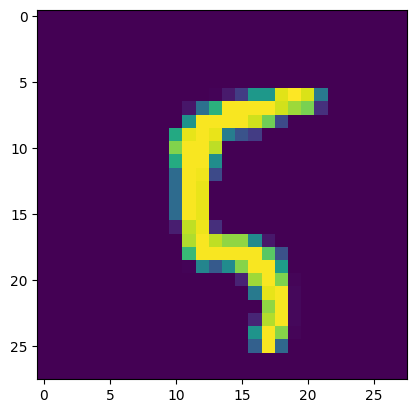

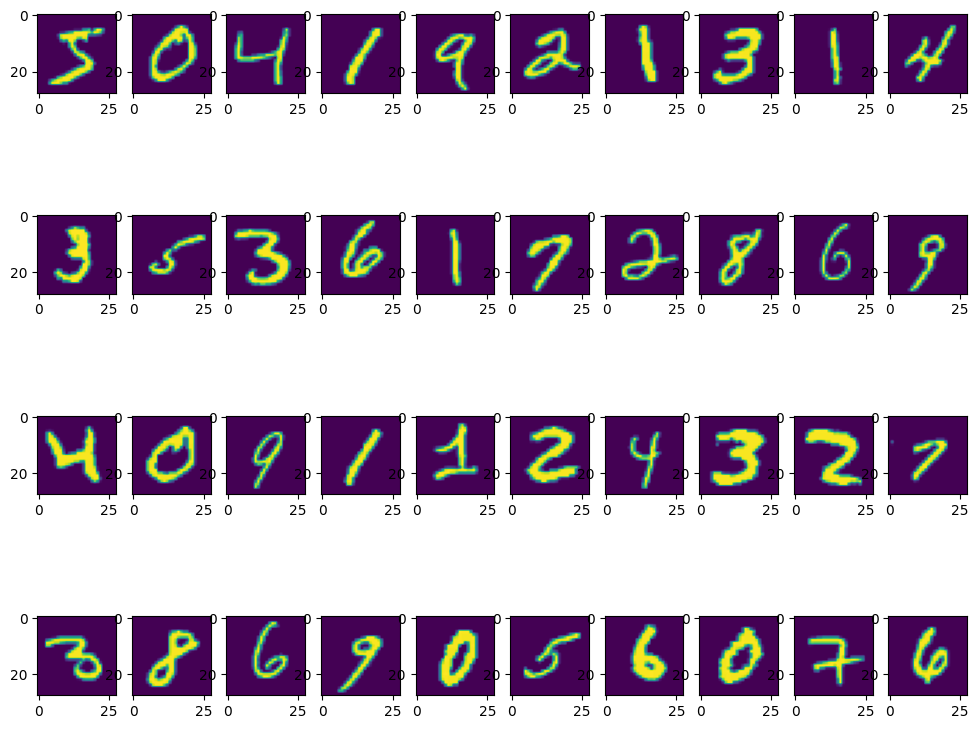

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img_id = 100

print('Image Shape:',x_train[img_id].shape)
print('Iname Label Array:',y_train[img_id],
'\nImages Label Shape:',y_train[img_id].shape,
'\nImage Label:', np.argmax(y_train[img_id]))

plt.imshow(x_train[img_id].reshape(28,28))
plt.show()

#
plt.figure(figsize=(12,10))
x,y = 10,4

for i in range(40):
  plt.subplot(y,x,i+1)
  plt.imshow(x_train[i].reshape((28,28)))
plt.show()

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers

input_shape = (28, 28, 1)
num_of_classes = 10

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_of_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
